# Alpha Group Sales Analysis


> The provided data represents information from a marketing campaign. They provided information about the product in the campaign/offer that was send to a specific customer and the convergence result of this campaign (label attribute).  They provided every attribute they have about the product, use whatever you see make sense to solve the defined project.

## Data Attributes
- __country__: Country name
- __article__: 6 digit article number, as unique identifier of an article
- __sales__:  total number of units sold in respective retail week
- __regular_price__: recommended retail price of the article
- __current_price__: current selling price (weighted average over the week)
- __ratio__: price ratio as current_price/regular_price, such that price discount is 1-ratio 
- __retailweek__: start date of the retailweek
- __promo1__: indicator for media advertisement, taking 1 in weeks of activation and 0 otherwise
- __promo2__: indicator for store events, taking 1 in weeks with events and 0 otherwise
- __customer_id__: customer unique identifier, one id per customer
- __article__: 6 digit article number, as unique identifier of an article
- __productgroup__: product group the article belongs to
- __category__:  product category the article belongs to
- __cost__:	 total costs of the article (assumed to be fixed over time)
- __style__: description of article design
- __sizes__: size range in which article is available
- __gender__: gender of target consumer of the article
- __rgb_*_main_color__: intensity of the red (r), green (g), and blue (b) primaries of the article‘s  main color, taking values [0,250]
- __rgb_*_sec_color__: intensity of the red (r), green (g), and blue (b) primaries of the article‘s secondary color, taking values [0,250]
- __label__: advertisement result after offering/sending/presenting the offer to the customer. 0 means the customer did not buy and 1 means the costomer did buy.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Data Loading

In [2]:
# Read CSV File
directory = "C:\\Users\\Huda Abd El Majeed\\Downloads\\"
file_name = 'full_gen_data.csv'
file_path = directory + file_name
df = pd.read_csv(file_path)
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


### Data Inspection

In [3]:
# Print the df shape
print('Data shape:', df.shape)

Data shape: (100000, 24)


In [4]:
# Print general info of the Df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

- __Data has no missing Values__
- __Some columns' datatype need to be fixed__
- __Some columns need to be renamed to be more discribtive__

In [5]:
# Duplicates Check
print('Duplicates:',df.duplicated().sum())

Duplicates: 0


- __Data has no duplicates__

In [6]:
# Explore unique values of categorical columns
categorical_columns = list(df.select_dtypes(include=['object']).columns)

def categorical_columns_value_counts(df, columns):
    for col in columns:
        value_counts = df[col].value_counts()[:50]
        unique_count = len(df[col].unique())
        print(f"Value counts of {col}:\nNo. of Unique values: {unique_count}\n{value_counts}' \n")
        
categorical_columns_value_counts(df, categorical_columns)

Value counts of country:
No. of Unique values: 3
country
Germany    49400
Austria    35140
France     15460
Name: count, dtype: int64' 

Value counts of article:
No. of Unique values: 477
article
BR3179    610
MR4948    560
XG6449    550
AA7884    540
OP1184    520
VS6613    510
QS5396    510
CB4942    510
ST3419    490
ZE9366    480
MA7179    480
XC9518    480
TX1463    480
IR3275    460
BS7795    460
EZ8648    450
MM4542    450
ZU5523    450
YX1723    440
KJ9185    430
HM5731    430
EF6812    420
RF6881    410
AP5568    410
PW6278    410
LH8921    410
DZ3492    410
WF4276    400
TX8432    400
LR5226    400
XH6675    390
JG1582    390
QS1816    380
QO8312    370
GJ5184    370
ZV2187    370
OC6355    370
ML2223    360
YX2167    360
UD3728    360
DI9187    360
VF7316    350
PY1913    350
TN7113    350
SA2925    350
ZZ2466    340
XN6238    340
LD8468    340
HZ9888    340
DW8683    340
Name: count, dtype: int64' 

Value counts of retailweek:
No. of Unique values: 123
retailweek
2015-11-22

- __Sales happened in 3 'countries' (_Germany_ - _Austria_ - _France_)__
- __'productgroup' column has 4 unique values with the dominance of (_SHOES_)__
- __'Style' column has 3 unique values__
- __'Gender' column has 4 unique values with the dominance of (_women_)__

In [7]:
# Summary statistics
df.describe()

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,56.781800,52.391200,28.290800,0.545646,0.061900,0.004900,2721.726500,6.517000,161.400000,139.600000,133.500000,207.700000,181.400000,209.900000,0.13928
std,87.934743,35.272128,22.578343,0.194363,0.240975,0.069829,1908.085499,3.914728,39.790147,63.641814,81.148727,35.313205,23.474359,45.306849,0.34624
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000,1.000000,1.290000,79.000000,26.000000,0.000000,164.000000,155.000000,155.000000,0.00000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000,1017.000000,2.290000,138.000000,104.000000,57.000000,164.000000,155.000000,155.000000,0.00000
50%,26.000000,40.950000,20.950000,0.525044,0.000000,0.000000,2091.000000,6.950000,160.000000,144.000000,143.000000,205.000000,187.000000,238.000000,0.00000
75%,64.000000,79.950000,37.950000,0.699248,0.000000,0.000000,4570.250000,9.600000,205.000000,181.000000,205.000000,255.000000,211.000000,255.000000,0.00000
max,898.000000,197.950000,195.950000,1.000000,1.000000,1.000000,5999.000000,13.290000,205.000000,238.000000,250.000000,255.000000,211.000000,255.000000,1.00000


- We can detect potential outliers in the __'Sales'__, __'Regular Price'__, __'Current Price'__, and __'Cost'__ columns. the maximum values of all of these columns are significantly higher than their respective 75th percentiles, they may indicate the presence of outliers.

In [8]:
df['promo1'].value_counts()

promo1
0    93810
1     6190
Name: count, dtype: int64

In [9]:
df['promo2'].value_counts()

promo2
0    99510
1      490
Name: count, dtype: int64

- __For both 'promo1' and 'promo2' columns the majority of weeks did not have the respective promotions or events, with only a small percentage of weeks having them.__

In [10]:
df['label'].value_counts()

label
0    86072
1    13928
Name: count, dtype: int64

- __Data seems imbalanced as there are 16.18% only purchased products after offering/sending/presenting the offer to the customer__

## Data Preprocessing

In [11]:
# Make a copy of the dataset
cleaned_df = df.copy()

In [12]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

### Data Cleaning 

In [13]:
# Fixing Data types
cleaned_df['retailweek'] = pd.to_datetime(cleaned_df['retailweek'])
cleaned_df['customer_id'] = cleaned_df['customer_id'].astype(int).astype(str)
cleaned_df['ratio'] = cleaned_df['ratio'].round(3)

In [14]:
# Rename columns
cleaned_df.rename(columns={'sales':'SalesPerWeek', 'promo1': 'MediaAdvertisement' , 'promo2': 'StoreEvent','customer_id': 'CustomerID', 'label': 'Purchase Label'}, inplace=True)

In [15]:
cleaned_df

,country,article,SalesPerWeek,regular_price,current_price,ratio,retailweek,MediaAdvertisement,StoreEvent,CustomerID,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,Purchase Label
0,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,PW6278,227,57.95,26.95,0.465,2016-06-26,0,0,1489,...,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,0
99996,Germany,PW6278,227,57.95,26.95,0.465,2016-06-26,0,0,1489,...,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,155,0
99997,Germany,PW6278,227,57.95,26.95,0.465,2016-06-26,0,0,1489,...,wide,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,155,0
99998,Germany,PW6278,227,57.95,26.95,0.465,2016-06-26,0,0,1489,...,slim,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,155,0


- After reviewing summary statistics above, we detected an __outliers__ in these columns :'Sales', 'Regular Price', 'Current Price', and 'Cost', Let's double check and see how we can deal with it


C:\Users\Huda Abd El Majeed\AppData\Local\Temp\ipykernel_49760\4897753.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  cleaned_df.hist(column=columns, ax=ax, grid=False)  # Set grid parameter to False
C:\Users\Huda Abd El Majeed\AppData\Local\Temp\ipykernel_49760\4897753.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  cleaned_df.hist(column=columns, ax=ax, grid=False)  # Set grid parameter to False
C:\Users\Huda Abd El Majeed\AppData\Local\Temp\ipykernel_49760\4897753.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  cleaned_df.hist(column=columns, ax=ax, grid=False)  # Set grid parameter to False


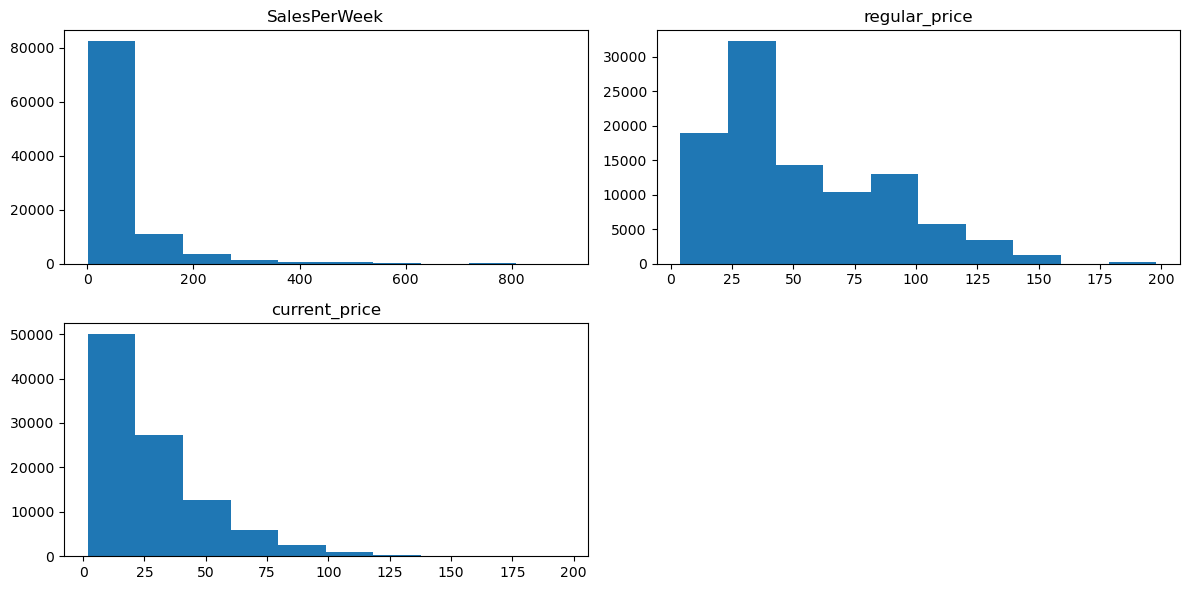

In [16]:
columns = ['SalesPerWeek','regular_price','current_price']

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

for i, col in enumerate(columns):
    ax = axes[i]
    cleaned_df.hist(column=columns, ax=ax, grid=False)  # Set grid parameter to False
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
# Display the plot
plt.tight_layout()
plt.show()

- 

### Feature Engineering

In [17]:
# Extract  Month, Year, day from retailweek column and create new columns
cleaned_df['Year'] = cleaned_df['retailweek'].dt.year
cleaned_df['Month'] = cleaned_df['retailweek'].dt.strftime('%b')
day_abbr = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
cleaned_df['DayOfWeek'] = cleaned_df['retailweek'].dt.dayofweek.map(day_abbr)

In [18]:
cleaned_df['Month_Year'] = cleaned_df['retailweek'].dt.strftime('%b %Y')

In [19]:
# create a function that calculates the week number within the month based on that date, and returns the week number
def calculate_week_number(date):
    # Calculate the week number for the given date
    week_number = (date.day - 1) // 7 + 1
    week_number = min(week_number, 5)
    # Return the week number as "Week X" format
    return f"Week {week_number}"

# Add a new column 'Week_Number' to the DataFrame
cleaned_df['Week_Number'] = cleaned_df['retailweek'].apply(calculate_week_number)

In [20]:
cleaned_df.head()

,country,article,SalesPerWeek,regular_price,current_price,ratio,retailweek,MediaAdvertisement,StoreEvent,CustomerID,...,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,Purchase Label,Year,Month,DayOfWeek,Month_Year,Week_Number
0,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,57,255,187,255,0,2016,Mar,Sat,Mar 2016,Week 4
1,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,104,255,187,255,0,2016,Mar,Sat,Mar 2016,Week 4
2,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,0,255,187,255,0,2016,Mar,Sat,Mar 2016,Week 4
3,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,149,164,211,238,0,2016,Mar,Sat,Mar 2016,Week 4
4,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,226,164,211,238,0,2016,Mar,Sat,Mar 2016,Week 4


In [21]:
cleaned_df['MonthWeek'] = cleaned_df['Month'] +" "+ cleaned_df['Week_Number']
cleaned_df

,country,article,SalesPerWeek,regular_price,current_price,ratio,retailweek,MediaAdvertisement,StoreEvent,CustomerID,...,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,Purchase Label,Year,Month,DayOfWeek,Month_Year,Week_Number,MonthWeek
0,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,255,187,255,0,2016,Mar,Sat,Mar 2016,Week 4,Mar Week 4
1,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,255,187,255,0,2016,Mar,Sat,Mar 2016,Week 4,Mar Week 4
2,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,255,187,255,0,2016,Mar,Sat,Mar 2016,Week 4,Mar Week 4
3,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,164,211,238,0,2016,Mar,Sat,Mar 2016,Week 4,Mar Week 4
4,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,164,211,238,0,2016,Mar,Sat,Mar 2016,Week 4,Mar Week 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,PW6278,227,57.95,26.95,0.465,2016-06-26,0,0,1489,...,164,211,238,0,2016,Jun,Sat,Jun 2016,Week 4,Jun Week 4
99996,Germany,PW6278,227,57.95,26.95,0.465,2016-06-26,0,0,1489,...,205,155,155,0,2016,Jun,Sat,Jun 2016,Week 4,Jun Week 4
99997,Germany,PW6278,227,57.95,26.95,0.465,2016-06-26,0,0,1489,...,205,155,155,0,2016,Jun,Sat,Jun 2016,Week 4,Jun Week 4
99998,Germany,PW6278,227,57.95,26.95,0.465,2016-06-26,0,0,1489,...,205,155,155,0,2016,Jun,Sat,Jun 2016,Week 4,Jun Week 4


In [22]:
# Create new columns 'Main RGB' & 'Second RGB' that Combine RGB Main & sec colors values
cleaned_df['Main RGB'] = cleaned_df.apply(lambda row: f"({row['rgb_r_main_col']}, {row['rgb_g_main_col']}, {row['rgb_b_main_col']})", axis =1)
cleaned_df['Second RGB'] = cleaned_df.apply(lambda row: f"({row['rgb_r_sec_col']}, {row['rgb_g_sec_col']}, {row['rgb_b_sec_col']})", axis =1)

In [23]:
# Drop rgb columns
cleaned_df.drop(['rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col'], axis = 1, inplace=True)
cleaned_df.drop(['rgb_r_sec_col', 'rgb_g_sec_col', 'rgb_b_sec_col'], axis = 1, inplace=True)

In [24]:
# Check unique values for both
cleaned_df['Main RGB'].unique()

array(['(205, 104, 57)', '(188, 238, 104)', '(205, 173, 0)',
       '(205, 140, 149)', '(138, 43, 226)', '(79, 148, 205)',
       '(139, 26, 26)', '(135, 206, 250)', '(181, 181, 181)',
       '(139, 137, 137)'], dtype=object)

In [25]:
cleaned_df['Second RGB'].unique()

array(['(255, 187, 255)', '(164, 211, 238)', '(205, 155, 155)'],
      dtype=object)

In [26]:
def map_rgb_to_color(df, rgb_column, color_column, color_mapping):
    """
       Map RGB values to color names and add color column to the DataFrame
       
    """
    cleaned_df[rgb_column] = cleaned_df[rgb_column].apply(lambda x: tuple(map(int, x.strip('()').split(', '))))
    cleaned_df[color_column] = cleaned_df[rgb_column].map(color_mapping).fillna('Unknown')

# Define color mappings
main_color_mapping = {
    (205, 104, 57): 'Orange',
    (188, 238, 104): 'Light Green',
    (205, 173, 0): 'Gold',
    (205, 140, 149): 'Light Pink',
    (138, 43, 226): 'Blue Violet',
    (79, 148, 205): 'Steel Blue',
    (139, 26, 26): 'Dark Red',
    (135, 206, 250): 'Sky Blue',
    (181, 181, 181): 'Grey',
    (139, 137, 137): 'Dark Grey'
}

second_color_mapping = {
    (255, 187, 255): 'Pink',
    (164, 211, 238): 'Baby Blue',
    (205, 155, 155): 'Ruddy Pink',
}

map_rgb_to_color(cleaned_df, 'Main RGB', 'Main Color', main_color_mapping)
map_rgb_to_color(cleaned_df, 'Second RGB', 'Second Color', second_color_mapping)

cleaned_df.head()

,country,article,SalesPerWeek,regular_price,current_price,ratio,retailweek,MediaAdvertisement,StoreEvent,CustomerID,...,Year,Month,DayOfWeek,Month_Year,Week_Number,MonthWeek,Main RGB,Second RGB,Main Color,Second Color
0,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,2016,Mar,Sat,Mar 2016,Week 4,Mar Week 4,"(205, 104, 57)","(255, 187, 255)",Orange,Pink
1,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,2016,Mar,Sat,Mar 2016,Week 4,Mar Week 4,"(188, 238, 104)","(255, 187, 255)",Light Green,Pink
2,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,2016,Mar,Sat,Mar 2016,Week 4,Mar Week 4,"(205, 173, 0)","(255, 187, 255)",Gold,Pink
3,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,2016,Mar,Sat,Mar 2016,Week 4,Mar Week 4,"(205, 140, 149)","(164, 211, 238)",Light Pink,Baby Blue
4,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,2016,Mar,Sat,Mar 2016,Week 4,Mar Week 4,"(138, 43, 226)","(164, 211, 238)",Blue Violet,Baby Blue


In [27]:
#Drop RGB columns after mapping and adding Colors Name to the dataFrame
cleaned_df.drop(['Main RGB', 'Second RGB'], axis = 1, inplace=True)

In [28]:
# Create new column 'Discount' from the 'ratio' column
cleaned_df['Discount'] = 1- cleaned_df['ratio'] 

In [29]:
# Create 'NetProfit' column
cleaned_df['NetProfit'] = cleaned_df['current_price'] - cleaned_df['cost']

In [30]:
cleaned_df['PricesDiff'] = cleaned_df['regular_price'] - cleaned_df['current_price']

In [31]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   country             100000 non-null  object        
 1   article             100000 non-null  object        
 2   SalesPerWeek        100000 non-null  int64         
 3   regular_price       100000 non-null  float64       
 4   current_price       100000 non-null  float64       
 5   ratio               100000 non-null  float64       
 6   retailweek          100000 non-null  datetime64[ns]
 7   MediaAdvertisement  100000 non-null  int64         
 8   StoreEvent          100000 non-null  int64         
 9   CustomerID          100000 non-null  object        
 10  article.1           100000 non-null  object        
 11  productgroup        100000 non-null  object        
 12  category            100000 non-null  object        
 13  cost                100000 non

In [32]:
cleaned_df

,country,article,SalesPerWeek,regular_price,current_price,ratio,retailweek,MediaAdvertisement,StoreEvent,CustomerID,...,Month,DayOfWeek,Month_Year,Week_Number,MonthWeek,Main Color,Second Color,Discount,NetProfit,PricesDiff
0,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,Mar,Sat,Mar 2016,Week 4,Mar Week 4,Orange,Pink,0.336,-9.34,2.0
1,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,Mar,Sat,Mar 2016,Week 4,Mar Week 4,Light Green,Pink,0.336,1.66,2.0
2,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,Mar,Sat,Mar 2016,Week 4,Mar Week 4,Gold,Pink,0.336,2.25,2.0
3,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,Mar,Sat,Mar 2016,Week 4,Mar Week 4,Light Pink,Baby Blue,0.336,-5.05,2.0
4,Germany,YN8639,28,5.95,3.95,0.664,2016-03-27,0,0,1003,...,Mar,Sat,Mar 2016,Week 4,Mar Week 4,Blue Violet,Baby Blue,0.336,-5.65,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,PW6278,227,57.95,26.95,0.465,2016-06-26,0,0,1489,...,Jun,Sat,Jun 2016,Week 4,Jun Week 4,Steel Blue,Baby Blue,0.535,22.75,31.0
99996,Germany,PW6278,227,57.95,26.95,0.465,2016-06-26,0,0,1489,...,Jun,Sat,Jun 2016,Week 4,Jun Week 4,Dark Red,Ruddy Pink,0.535,17.05,31.0
99997,Germany,PW6278,227,57.95,26.95,0.465,2016-06-26,0,0,1489,...,Jun,Sat,Jun 2016,Week 4,Jun Week 4,Sky Blue,Ruddy Pink,0.535,21.75,31.0
99998,Germany,PW6278,227,57.95,26.95,0.465,2016-06-26,0,0,1489,...,Jun,Sat,Jun 2016,Week 4,Jun Week 4,Grey,Ruddy Pink,0.535,25.66,31.0


## EDA

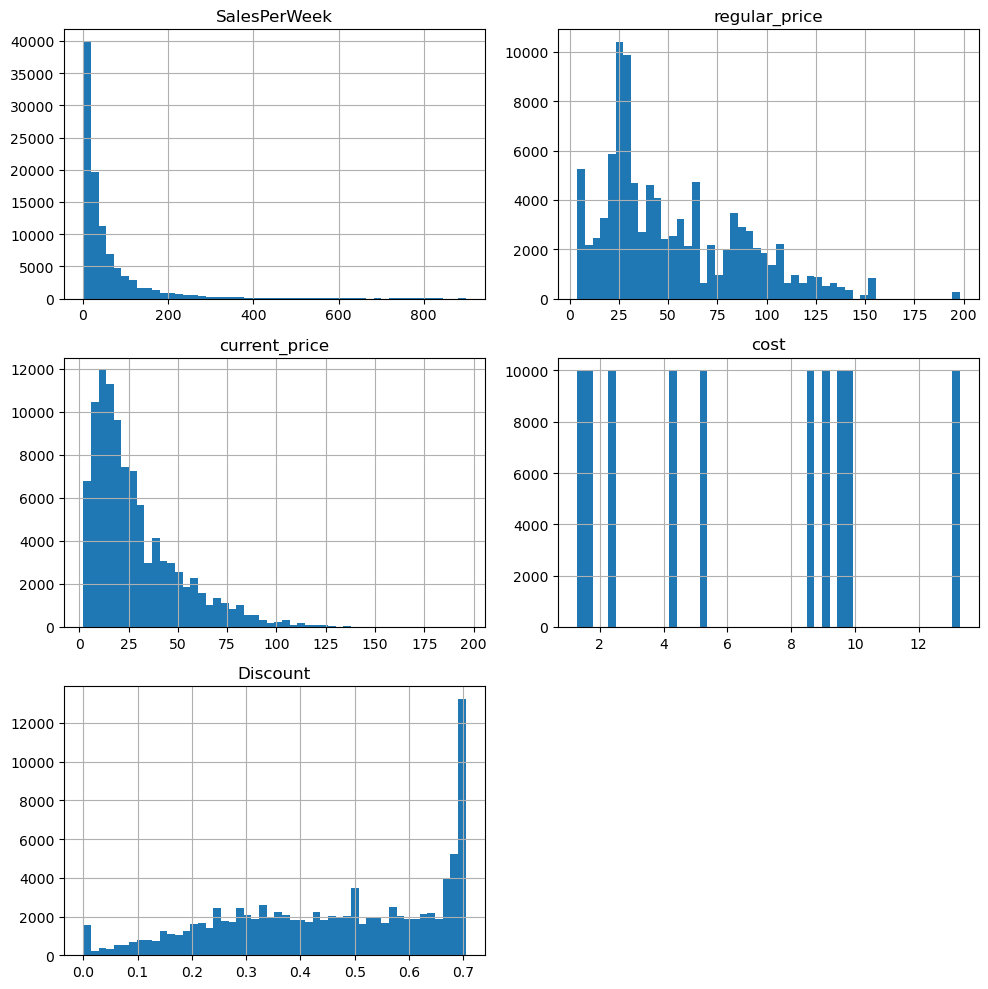

In [33]:
columns = ['SalesPerWeek', 'regular_price', 'current_price', 'cost', 'Discount']
cleaned_df[columns].hist(bins=50,figsize=(10,10))
plt.tight_layout()
plt.show()

<Axes: >

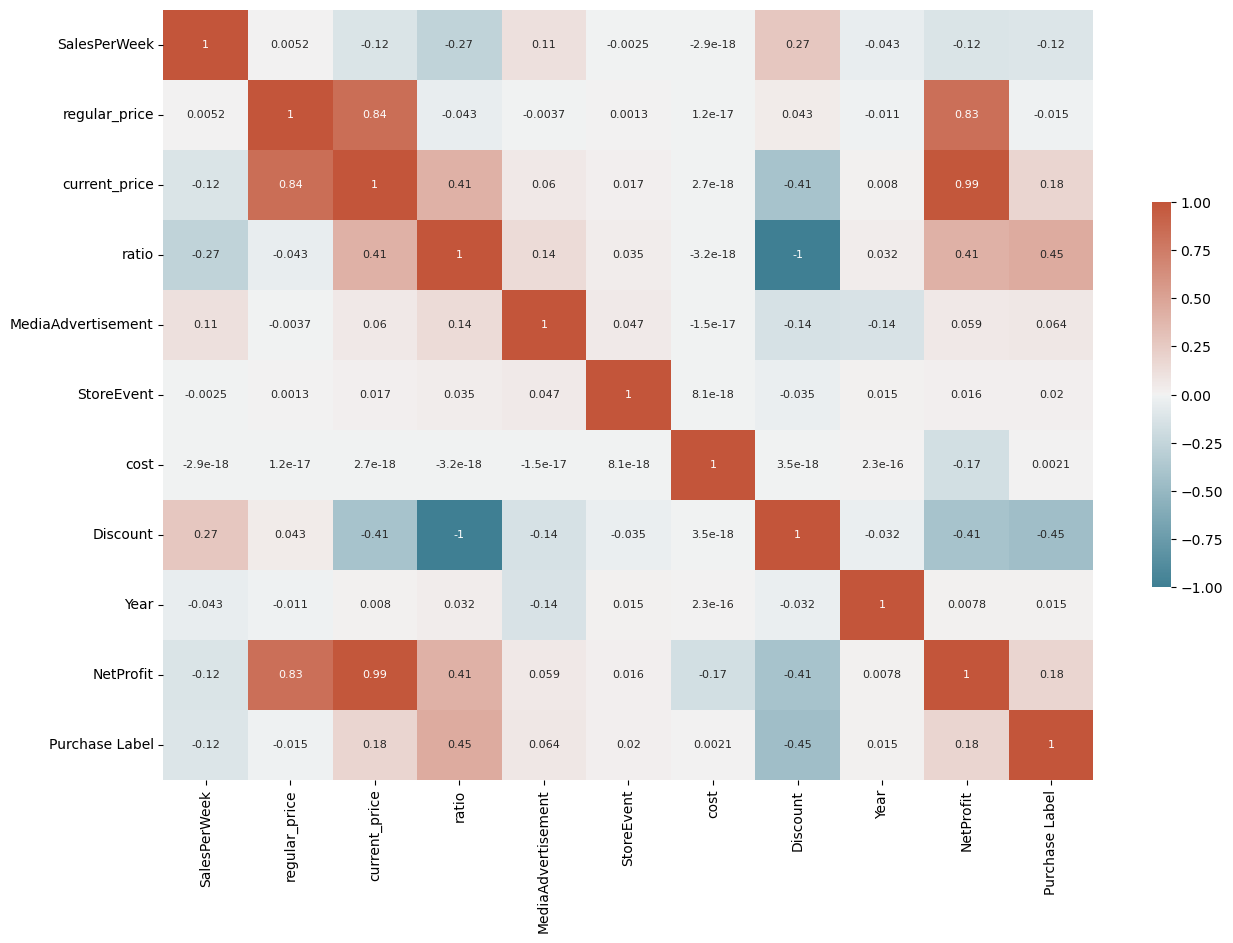

In [35]:
# calculate correlation matrix
cols= ['SalesPerWeek', 'regular_price', 'current_price',
       'ratio', 'MediaAdvertisement', 'StoreEvent','cost', 'Discount','Month',
       'Year', 'NetProfit','Purchase Label']

corr = cleaned_df[cols].corr(numeric_only= True)# plot the heatmap

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(corr, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True),                        
            cbar_kws={"shrink": .5}, annot=True,annot_kws={"fontsize":8}
            )

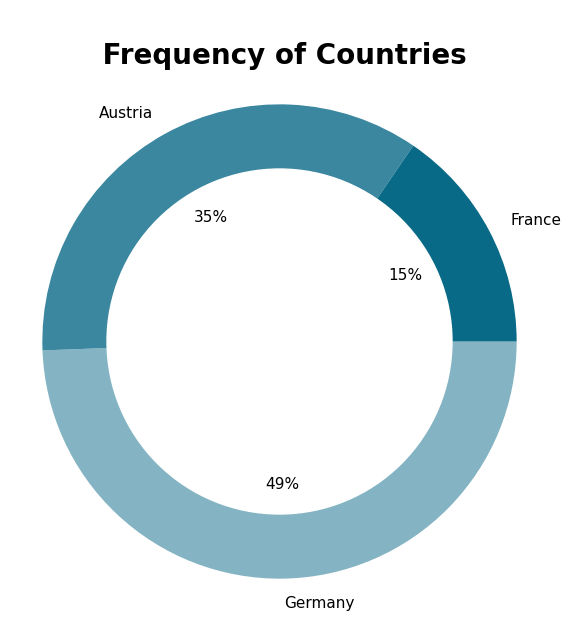

In [36]:
plt.subplots(figsize=(15, 7))
country = cleaned_df['country'].value_counts()
colors = ['#84b4c3','#3a879f', '#096a87']
plt.pie(country, labels=country.index, radius=1.1, counterclock=False, textprops={'fontsize' : 11}, autopct='%1.0f%%', colors=colors);
plt.title("\n Frequency of Countries", fontsize= 20, fontweight='bold')
circle=plt.Circle( (0,0), 0.8, color='white')
p=plt.gcf()
p.gca().add_artist(circle);

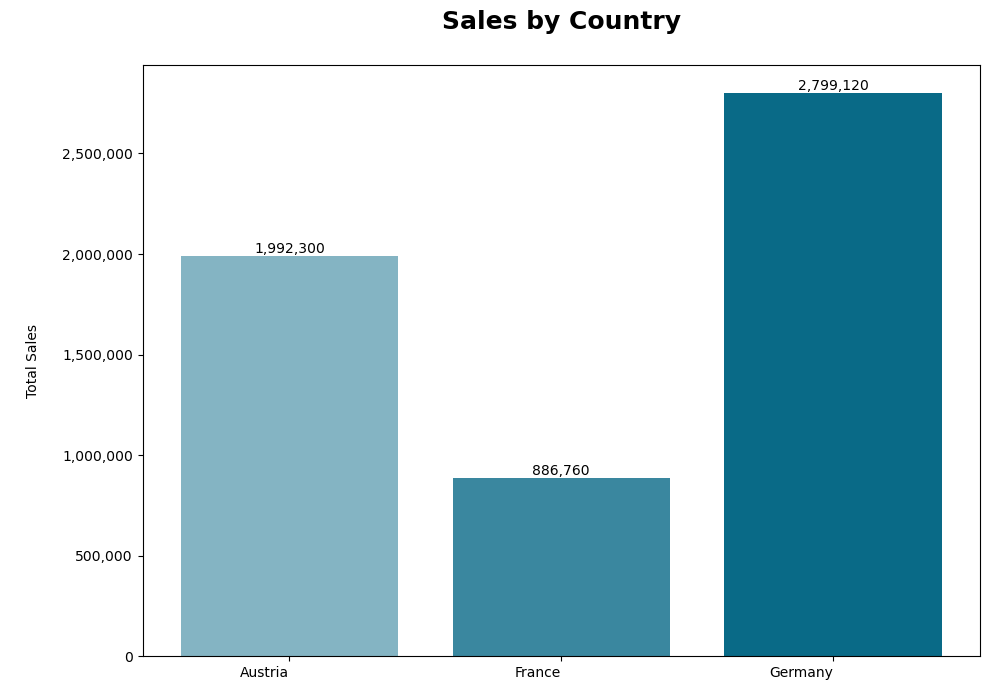

In [37]:
sales_by_country_week = cleaned_df.groupby('country')['SalesPerWeek'].sum().reset_index()

# Grouping data by country, summing up sales
sales_by_country = sales_by_country_week.groupby('country')['SalesPerWeek'].sum().reset_index()

# Creating the bar chart
plt.figure(figsize=(10, 7))
bars = plt.bar(sales_by_country['country'], sales_by_country['SalesPerWeek'], color='skyblue')
plt.bar(sales_by_country['country'], sales_by_country['SalesPerWeek'], color=colors)
plt.title('Sales by Country\n', fontsize=18, fontweight='bold')
plt.xlabel('\n')
plt.ylabel('\nTotal Sales\n')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))

# Add sales value on each bar
for bar, sales in zip(bars, sales_by_country['SalesPerWeek']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{sales:,}', ha='center', va='bottom')
plt.xticks(ha='right')
plt.tight_layout()

# Show plot
plt.show()

- __Germany has the heighest distribution with 49% and therefore the highest sales, followed by Austria, and France__
- __Data looks imbalanced towards Germany__

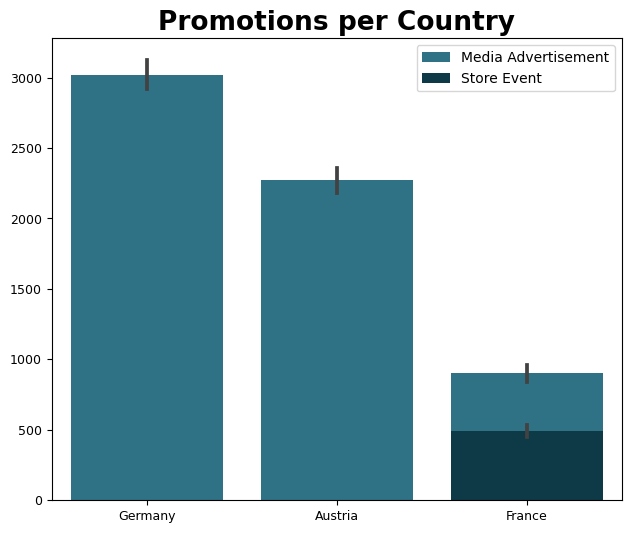

In [38]:
# Create a bar plot to calculate the count of promo1 and promo2 by country
plt.figure(figsize=(25,6))
plt.subplot(1, 3, 1)
sns.barplot(x= cleaned_df['country'],y=cleaned_df['MediaAdvertisement'],estimator='sum', label='Media Advertisement',color='#217893')
sns.barplot(x= cleaned_df['country'],y=cleaned_df['StoreEvent'],estimator='sum', label='Store Event',color='#053f51')

plt.xlabel('\n')
plt.ylabel("\n")
plt.title('Promotions per Country', fontsize= 19, fontweight='bold')
plt.xticks( fontsize=9)
plt.yticks(fontsize=9);
plt.legend()
plt.show()

- __Store Event promotion appears only in France__
- __Media Ads promotion's been launched in all countries with the highest number of occurrence in Germany__

In [39]:
cleaned_df.groupby(['country'])['MediaAdvertisement'].sum()

country
Austria    2270
France      900
Germany    3020
Name: MediaAdvertisement, dtype: int64

In [40]:
cleaned_df.groupby(['country'])['StoreEvent'].sum()

country
Austria      0
France     490
Germany      0
Name: StoreEvent, dtype: int64

In [41]:
# Success_rate of MediaAdvertisement

# Get the list of unique countries in the dataset
countries = cleaned_df['country'].unique()

# Iterate over each country
for country in countries:
    # Filter the dataset for the current country and the desired conditions
    filtered_df = cleaned_df[(cleaned_df['country'] == country) & (cleaned_df['MediaAdvertisement'] == 1) & (cleaned_df['StoreEvent'] == 0) & (cleaned_df['Purchase Label'] == 1) ]

    # Calculate the success rate for promo1 in the current country
    success_rate = (len(filtered_df) / len(cleaned_df[(cleaned_df['country'] == country) & (cleaned_df['MediaAdvertisement'] == 1) & (cleaned_df['StoreEvent'] == 0)])) * 100

    # Print the success rate for the current country
    print(f"Media Advertisement Success Rate for {country}: {success_rate}%")


# success rate of promo2 in France

# Calculate the success rate for promo1 in the current country
filtered_df2 = cleaned_df[(cleaned_df['country'] == 'France') & (cleaned_df['MediaAdvertisement'] == 0) & (cleaned_df['Purchase Label'] == 1) & (cleaned_df['StoreEvent'] == 1)]
success_rate2 = (len(filtered_df) / len(cleaned_df[(cleaned_df['country'] == 'France') & (cleaned_df['MediaAdvertisement'] == 0) & (cleaned_df['StoreEvent'] == 1)] )) * 100
# Print the success rate for the current country
print(f"Store Event Success Rate for France: {success_rate2}%")

Media Advertisement Success Rate for Germany: 22.251655629139073%
Media Advertisement Success Rate for Austria: 22.86343612334802%
Media Advertisement Success Rate for France: 20.759493670886076%
Store Event Success Rate for France: 43.15789473684211%


- __Media Advertisement promotion has close success rate percentages in all countries but with highest percentage in Austria 22.9%__
- __Store Event promotion seems so effective in France as it's twice the percentage of Media ads promotion there__

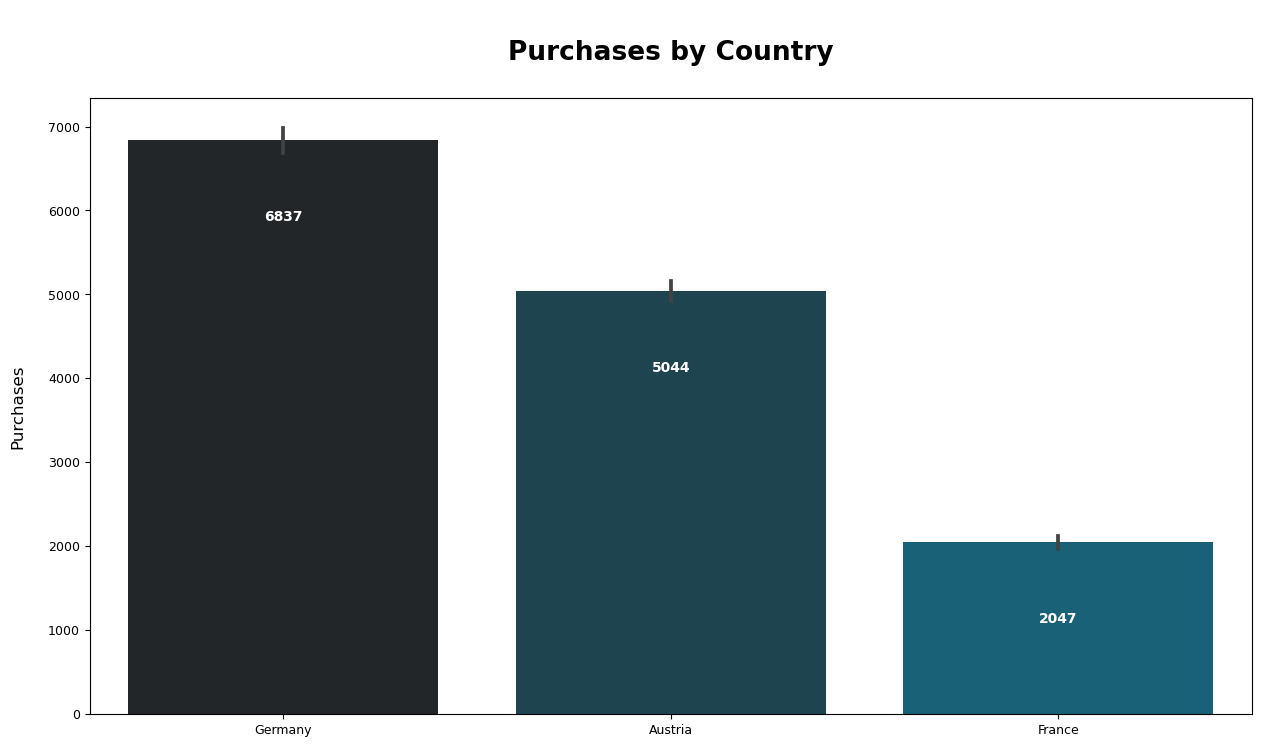

In [42]:
base_color = sns.color_palette("dark:#096A87",as_cmap=True)
colors2 = sns.color_palette("dark:#096A87", n_colors=len(cleaned_df['country'].unique()))
plt.figure(figsize=(15,8))
ax = sns.barplot(data=cleaned_df, x='country', y='Purchase Label', palette=colors2, estimator='sum');
plt.title('\nPurchases by Country\n', fontsize=19, fontweight='bold');
plt.xlabel('\n', fontsize=12, fontweight='bold');
plt.ylabel('Purchases\n', fontsize=12);
plt.xticks(fontsize=9)
plt.yticks(fontsize=9);
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 1000, 
            f'{bar.get_height():.0f}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='white')

plt.show()

- __Germany has the highest number of purchases__

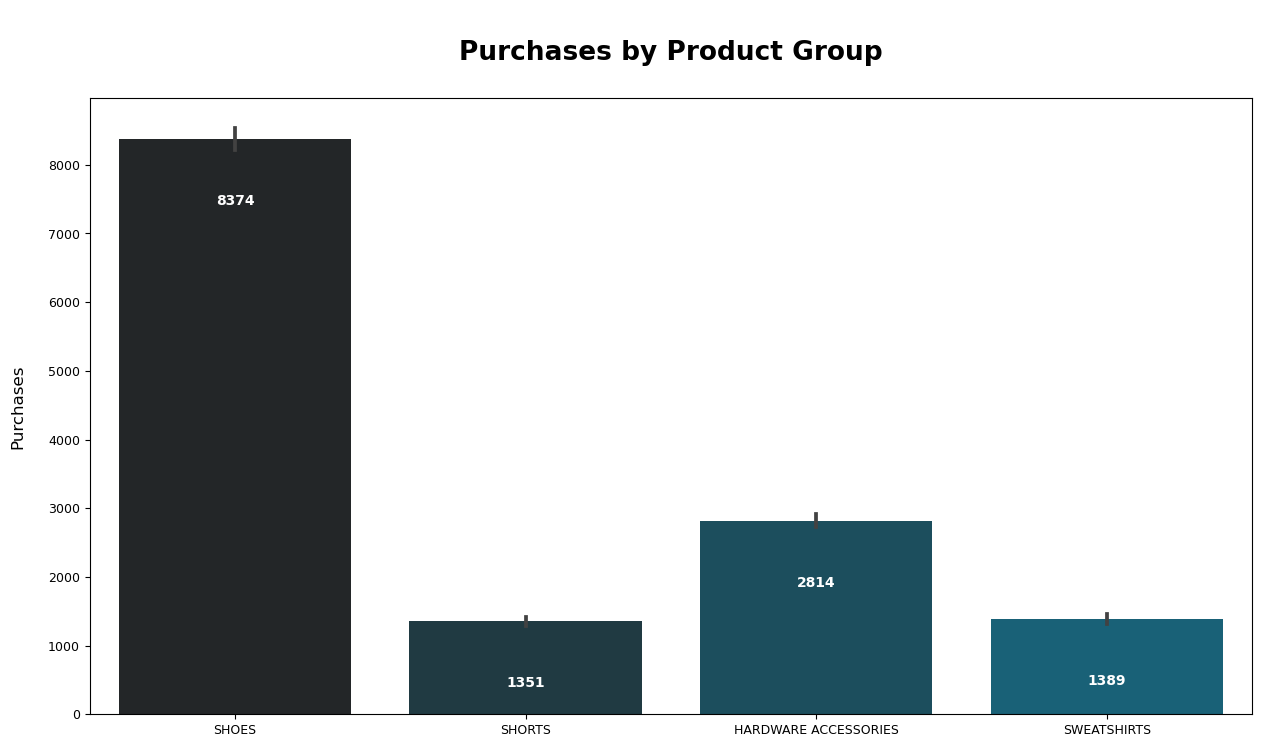

In [43]:
base_color = sns.color_palette("dark:#096A87",as_cmap=True)
colors = sns.color_palette("dark:#096A87", n_colors=len(cleaned_df['productgroup'].unique()))
plt.figure(figsize=(15,8))
ax = sns.barplot(data=cleaned_df, x='productgroup', y='Purchase Label', palette=colors, estimator='sum');
plt.title('\nPurchases by Product Group\n', fontsize=19, fontweight='bold');
plt.xlabel('\n', fontsize=12, fontweight='bold');
plt.ylabel('Purchases\n', fontsize=12);
plt.xticks(fontsize=9)
plt.yticks(fontsize=9);
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 1000, 
            f'{bar.get_height():.0f}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='white')

plt.show()

- __Data looks imbalanced towards the shoes items__
- __Shoes is the most purchased product, followed by Hard Access, Sweatshirts, and shorts__

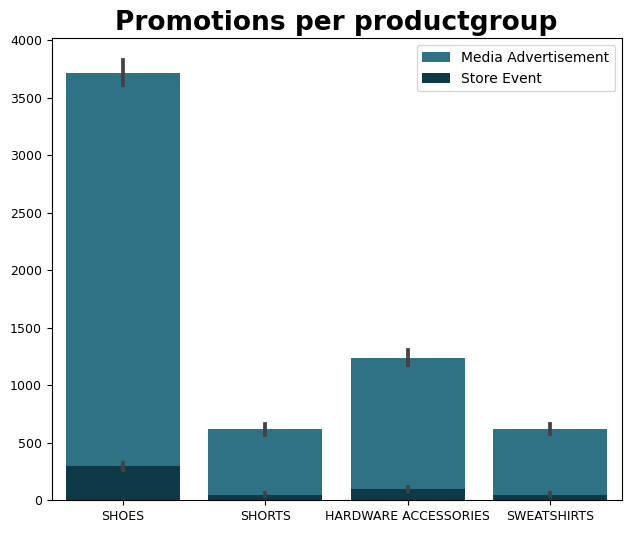

In [44]:
# Create a bar plot to calculate the count of promo1 and promo2 by country
plt.figure(figsize=(25,6))
plt.subplot(1, 3, 1)
sns.barplot(x= cleaned_df['productgroup'],y=cleaned_df['MediaAdvertisement'],estimator='sum', label='Media Advertisement',color='#217893')
sns.barplot(x= cleaned_df['productgroup'],y=cleaned_df['StoreEvent'],estimator='sum', label='Store Event',color='#053f51')

plt.xlabel('\n')
plt.ylabel("\n")
plt.title('Promotions per productgroup', fontsize= 19, fontweight='bold')
plt.xticks( fontsize=9)
plt.yticks(fontsize=9);
plt.legend()
plt.show()

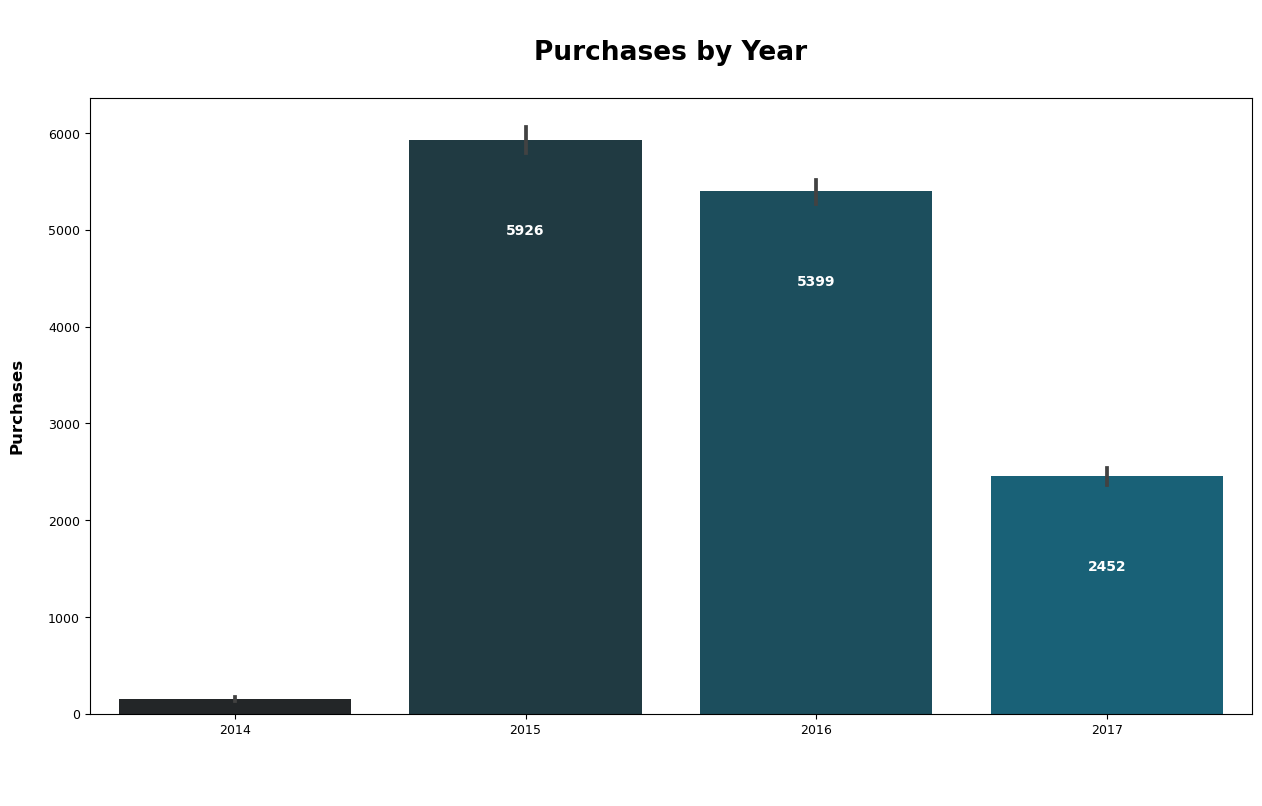

In [45]:
base_color = sns.color_palette("dark:#096A87",as_cmap=True)
colors = sns.color_palette("dark:#096A87", n_colors=len(cleaned_df['Year'].unique()))
plt.figure(figsize=(15,8))
ax = sns.barplot(data=cleaned_df, x='Year', y='Purchase Label', palette=colors, estimator='sum');
plt.title('\nPurchases by Year\n', fontsize=19, fontweight='bold');
plt.xlabel('\n', fontsize=12, fontweight='bold');
plt.ylabel('Purchases\n', fontsize=12, fontweight='bold');
plt.xticks(fontsize=9)
plt.yticks(fontsize=9);
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 1000, 
            f'{bar.get_height():.0f}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='white')

plt.show()

- __2015 is The year with the highest number of purchases followed by 2016, 2017 and the lowest purchases count in 2014__

In [46]:
cleaned_df = cleaned_df.sort_values('retailweek')

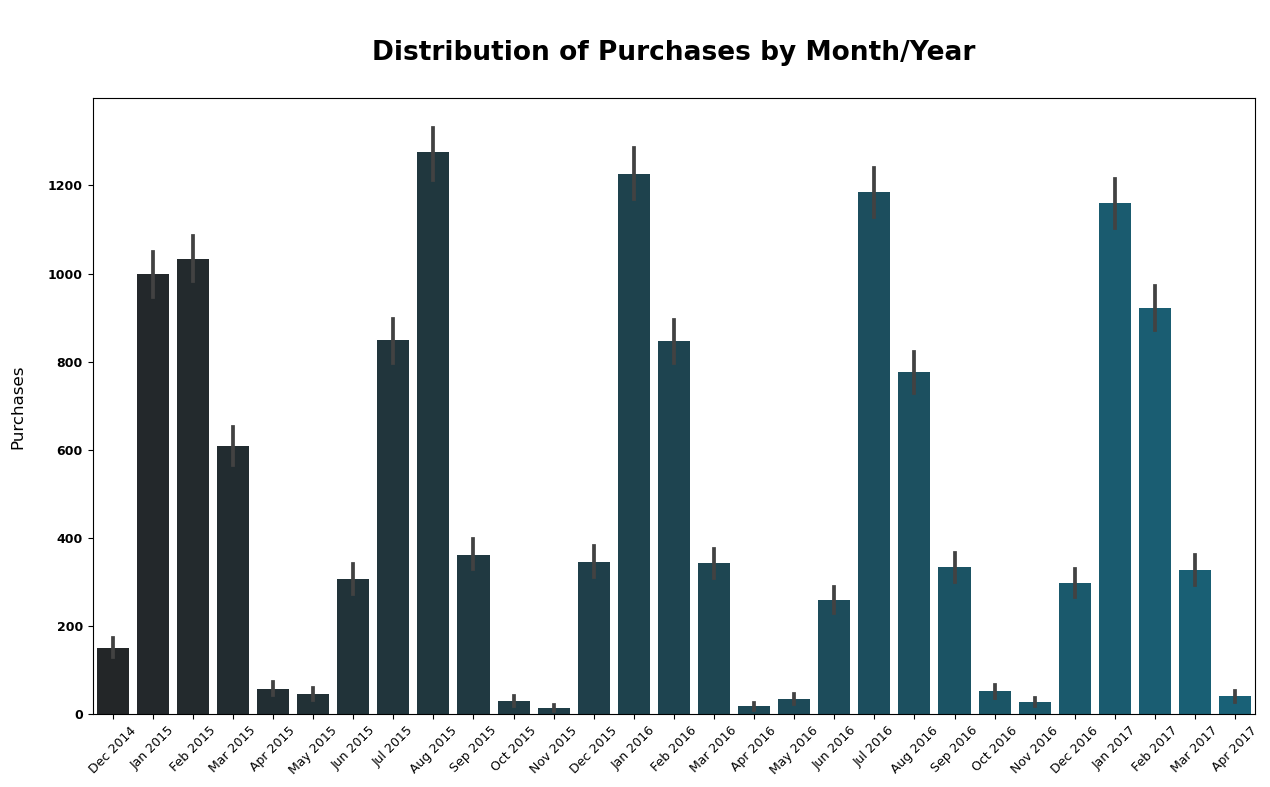

In [47]:
base_color = sns.color_palette("dark:#096A87",as_cmap=True)
colors = sns.color_palette("dark:#096A87", n_colors=len(cleaned_df['Month_Year'].unique()))
plt.figure(figsize=(15,8))
ax = sns.barplot(data=cleaned_df, x='Month_Year', y='Purchase Label', palette=colors, estimator='sum');
plt.title('\nDistribution of Purchases by Month/Year\n', fontsize=19, fontweight='bold');
plt.xlabel('\n', fontsize=12, fontweight='bold');
plt.ylabel('Purchases\n', fontsize=12);
plt.xticks(rotation=45,fontsize=9)
plt.yticks(fontsize=9, fontweight='bold');

plt.show()

- __In August 2015, we observed the peak in purchase activity. Conversely, the months with the lowest purchase counts are June, April, May, November, and October__


In [48]:
cleaned_df.groupby(['Month_Year'])['Purchase Label'].sum()

Month_Year
Apr 2015      57
Apr 2016      18
Apr 2017      41
Aug 2015    1275
Aug 2016     776
Dec 2014     151
Dec 2015     345
Dec 2016     298
Feb 2015    1033
Feb 2016     846
Feb 2017     923
Jan 2015     998
Jan 2016    1225
Jan 2017    1161
Jul 2015     850
Jul 2016    1185
Jun 2015     307
Jun 2016     259
Mar 2015     609
Mar 2016     343
Mar 2017     327
May 2015      45
May 2016      35
Nov 2015      14
Nov 2016      28
Oct 2015      31
Oct 2016      52
Sep 2015     362
Sep 2016     334
Name: Purchase Label, dtype: int64

In [49]:
cleaned_df = cleaned_df.sort_values('Month')

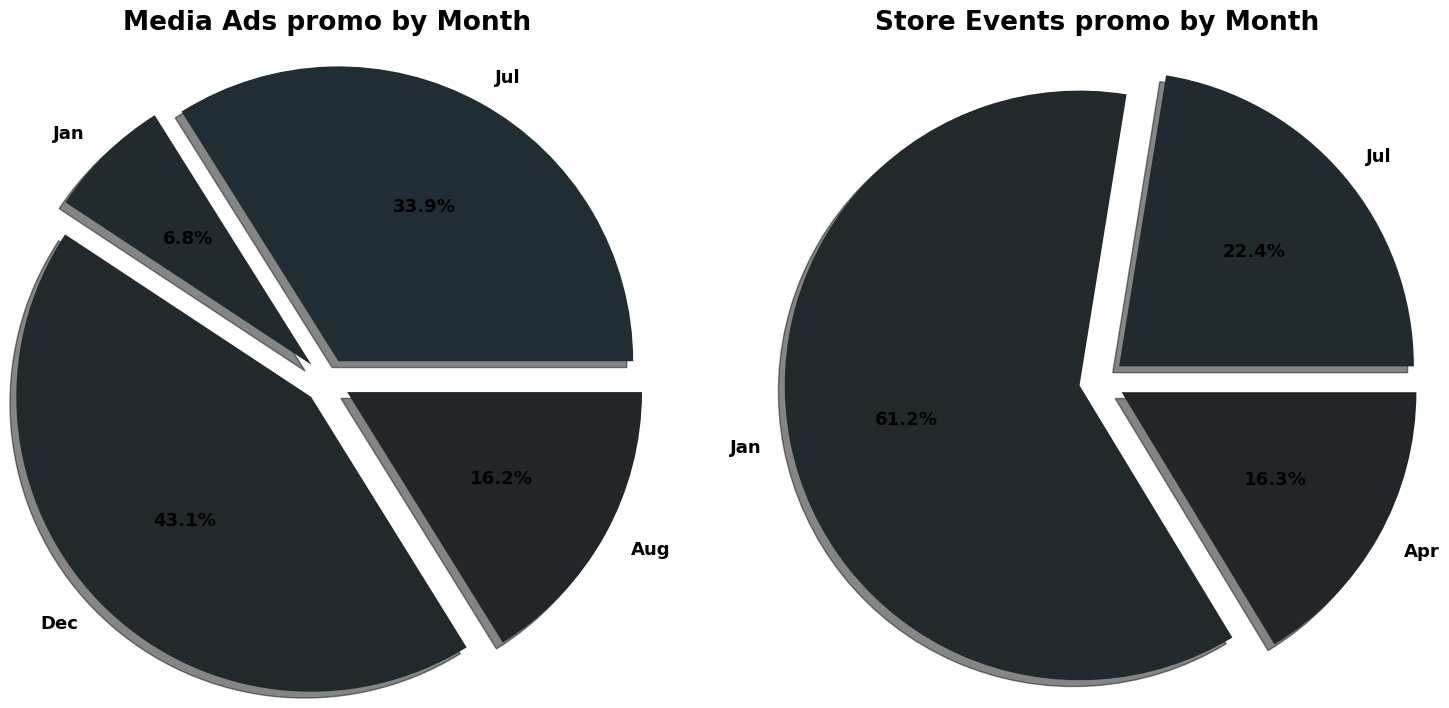

In [50]:
# Define Month_nonzero and Month_nonzero2 first
Month_nonzero = cleaned_df.groupby('Month')['MediaAdvertisement'].sum()
Month_nonzero2 = cleaned_df.groupby('Month')['StoreEvent'].sum()

# Filter out months with zero values for both indicators
Month_nonzero = Month_nonzero[Month_nonzero != 0]
Month_nonzero2 = Month_nonzero2[Month_nonzero2 != 0]

# Plot the pie charts
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.pie(Month_nonzero, labels=Month_nonzero.index, autopct="%1.1f%%", radius=1.3, counterclock=False, textprops={'fontsize': 13, 'fontweight': 'bold'}, shadow=True, explode=(0.1,) * len(Month_nonzero), colors=colors)
plt.title('Media Ads promo by Month\n\n', fontsize=19, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.subplot(1, 2, 2)
plt.pie(Month_nonzero2, labels=Month_nonzero2.index, autopct="%1.1f%%", radius=1.3, counterclock=False, textprops={'fontsize': 13, 'fontweight': 'bold'}, shadow=True, explode=(0.1,) * len(Month_nonzero2), colors=colors)
plt.title('Store Events promo by Month \n\n', fontsize=19, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Save the figure and display the plot
plt.tight_layout()
plt.show()

- __Promotions occurring primarily in December, with some continuation into January, lead to increased purchases in both January and February. Additionally, promotions in July and August significantly boost purchases during these months.__

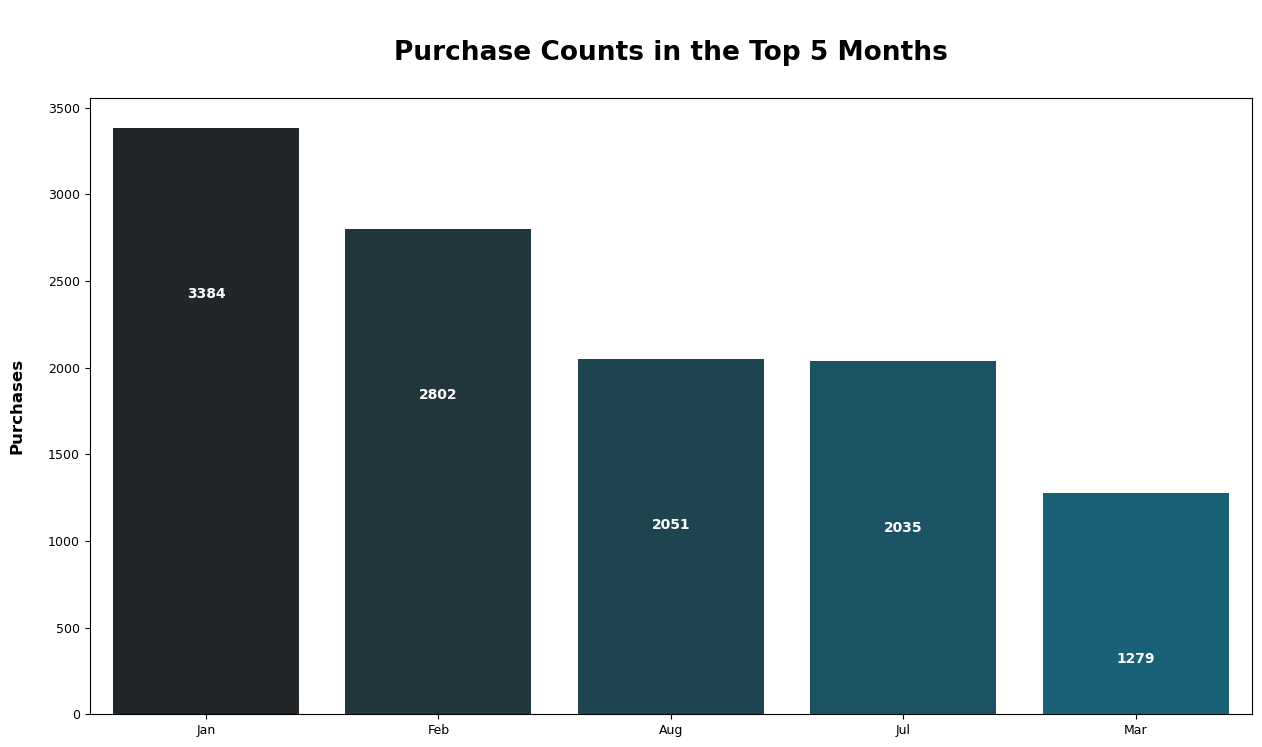

In [51]:
purchase_counts_by_month = cleaned_df.groupby('Month')['Purchase Label'].sum().reset_index()
purchase_counts_by_month = purchase_counts_by_month.sort_values(by='Purchase Label', ascending=False)

# Select only the top 5 months
top_5_months = purchase_counts_by_month.head()

# Create the color palette
base_color = sns.color_palette("dark:#096A87", as_cmap=True)
colors = sns.color_palette("dark:#096A87", n_colors=len(top_5_months))

# Create the bar plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=top_5_months, x='Month', y='Purchase Label', palette=colors, estimator=sum)
plt.title('\nPurchase Counts in the Top 5 Months\n', fontsize=19, fontweight='bold')
plt.xlabel('\n', fontsize=12, fontweight='bold')
plt.ylabel('Purchases\n', fontsize=12, fontweight='bold')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Add values inside the bars
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 1000, 
            f'{bar.get_height():.0f}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='white')

plt.show()

- __Promotions occurring primarily in December, with some continuation into January, lead to increased purchases in both January and February. Additionally, promotions in July and August significantly boost purchases during these months.__

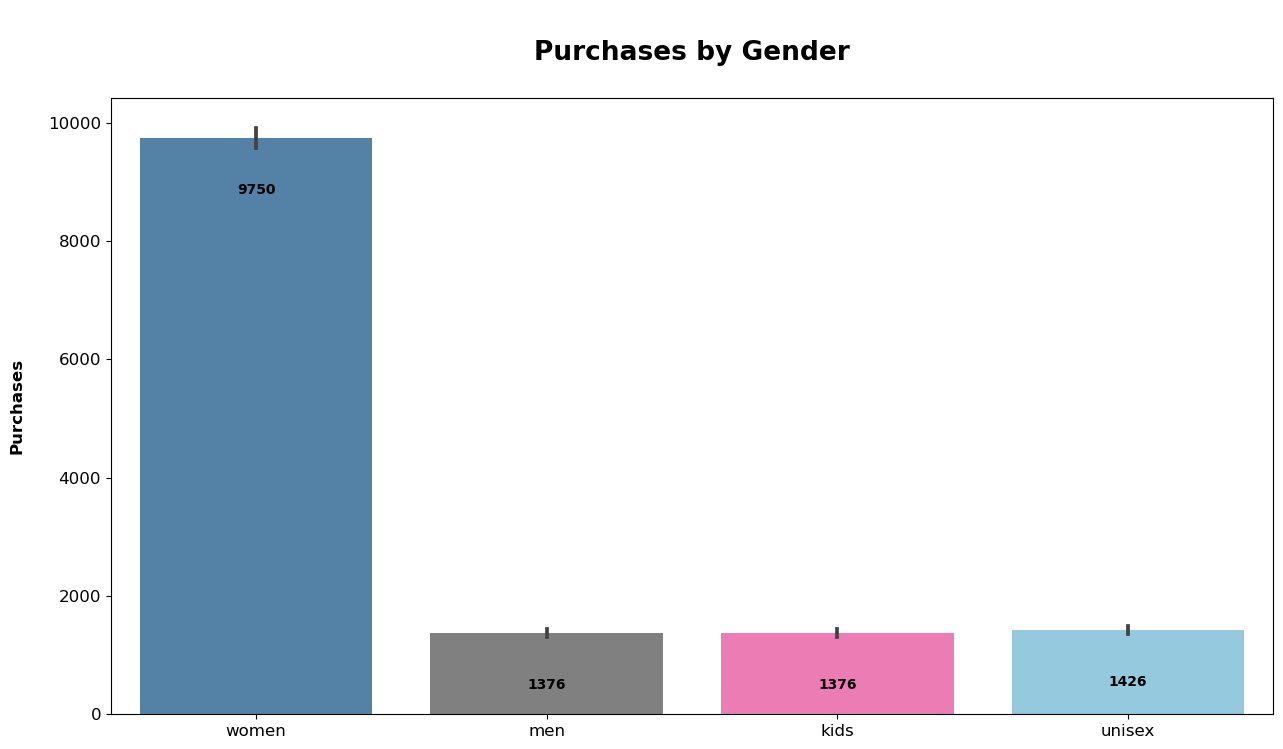

In [52]:
#base_color = sns.color_palette("dark:#096A87",as_cmap=True)
#colors = sns.color_palette("dark:#096A87", n_colors=len(cleaned_df['gender'].unique()))
colors = ['#4682B4','#808080', '#FF69B4','#87CEEB']
plt.figure(figsize=(15,8))
ax = sns.barplot(data=cleaned_df, x='gender', y='Purchase Label', palette=colors, estimator='sum');
plt.title('\nPurchases by Gender\n', fontsize=19, fontweight='bold');
plt.xlabel('\n', fontsize=12, fontweight='bold');
plt.ylabel('Purchases\n', fontsize=12, fontweight='bold');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 1000, 
            f'{bar.get_height():.0f}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.show()

- __Women having the highest number of purchases in the gender category__

In [53]:
genders = cleaned_df['gender'].unique()

# Iterate over each country
for gender in genders:
    # Filter the dataset for the current gender and the desired conditions
    filtered_df = cleaned_df[(cleaned_df['gender'] == gender) & (cleaned_df['Purchase Label'] == 1)]

    # Calculate the percentage of purchases done by each gender
    percentage_rate = (len(filtered_df) / len(df[(df['gender'] == gender)])) * 100

    # Print the  percentage of purchases done by each gender
    print(f"percentage of purchases for {gender}: {percentage_rate}%")

percentage of purchases for women: 13.928571428571429%
percentage of purchases for men: 13.76%
percentage of purchases for kids: 13.76%
percentage of purchases for unisex: 14.26%


- __the number of purchases made by women is significantly higher than the number made by men, but when considering the percentage of purchases within each gender category, the distribution across different purchase categories is relatively balanced.__

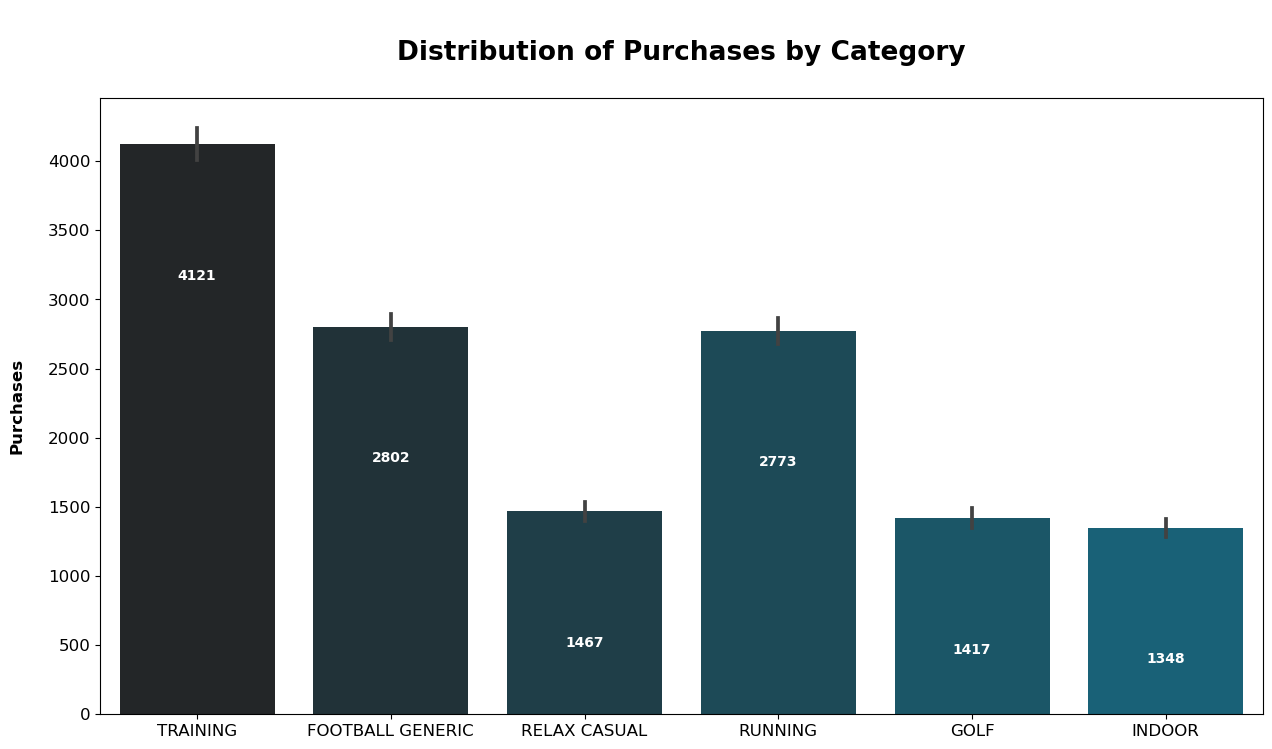

In [54]:
base_color = sns.color_palette("dark:#096A87",as_cmap=True)
colors = sns.color_palette("dark:#096A87", n_colors=len(cleaned_df['category'].unique()))
plt.figure(figsize=(15,8))
ax = sns.barplot(data=cleaned_df, x='category', y='Purchase Label', palette=colors, estimator='sum');
plt.title('\nDistribution of Purchases by Category\n', fontsize=19, fontweight='bold');
plt.xlabel('\n', fontsize=12, fontweight='bold');
plt.ylabel('Purchases\n', fontsize=12, fontweight='bold');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 1000, 
            f'{bar.get_height():.0f}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='white')

plt.show()

- __Training category has the highest number of purchases, then Running and Football generic__

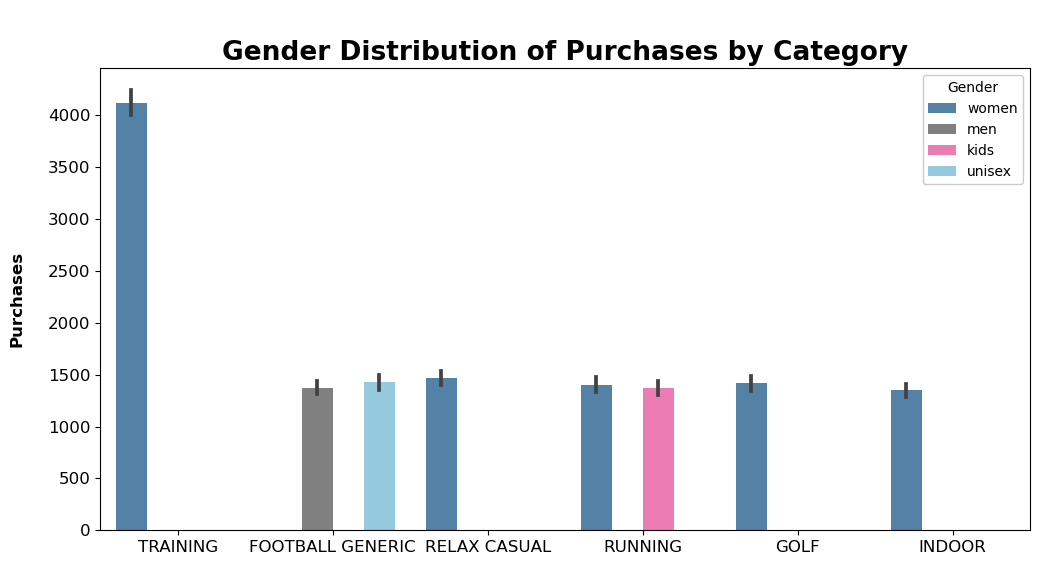

In [55]:
plt.figure(figsize=(12,6))
colors = ['#4682B4', '#808080','#FF69B4','#87CEEB']  # Hex strings for pink, babyblue, Navy, grey
ax = sns.barplot(x=cleaned_df['category'], y=cleaned_df['Purchase Label'], estimator='sum', hue=cleaned_df['gender'], palette=colors)

# Get the handles and labels from the plot
handles, labels = ax.get_legend_handles_labels()

# Create the legend with custom handles and labels
legend = plt.legend(handles, labels, loc='upper right', ncol=1, framealpha=1, title='Gender')

plt.title('\nGender Distribution of Purchases by Category', fontsize=19, fontweight='bold')
plt.xlabel('\n', fontsize=12, fontweight='bold')
plt.ylabel('Purchases\n', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

- __Women are buying a lot more products in categories like "TRAINING," "GOLF," "INDOOR," and "RELAX CASUAL." This shows that these types of products are popular among women. However, there might be a problem because it seems like men and kids aren't buying as much. To fix this, we might need to offer a wider variety of products that appeal to everyone.__


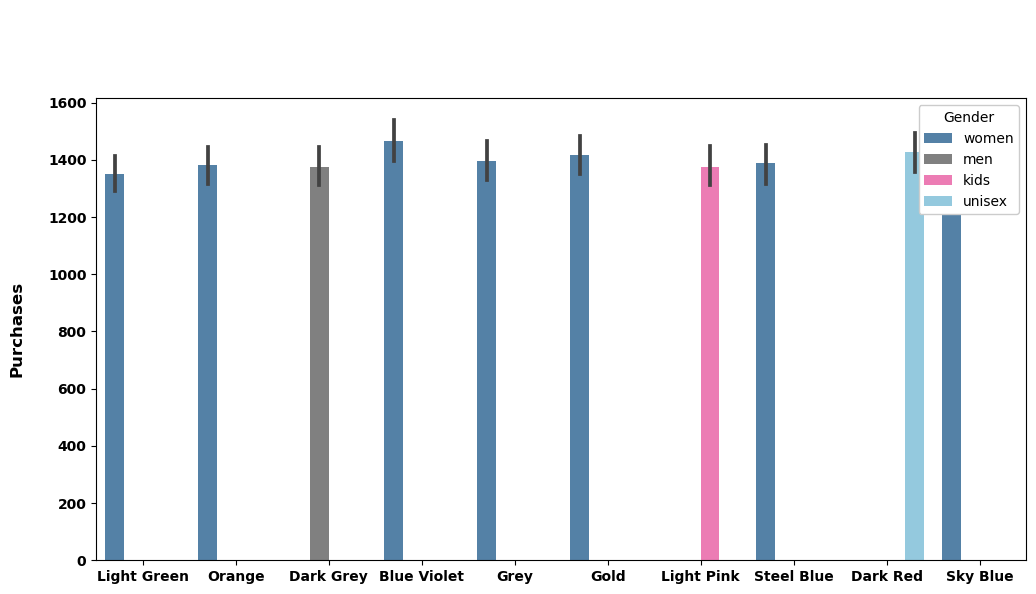

In [56]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=cleaned_df['Main Color'], y=cleaned_df['Purchase Label'], estimator='sum', hue=cleaned_df['gender'], palette=colors)

# Get the handles and labels from the plot
handles, labels = ax.get_legend_handles_labels()

# Create the legend with custom handles and labels
legend = plt.legend(handles, labels, loc='upper right', ncol=1, framealpha=1, title='Gender')

plt.title('\n\n', fontsize=19, fontweight='bold')
plt.xlabel('\n', fontsize=12, fontweight='bold')
plt.ylabel('Purchases\n', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Show the plot
plt.show()

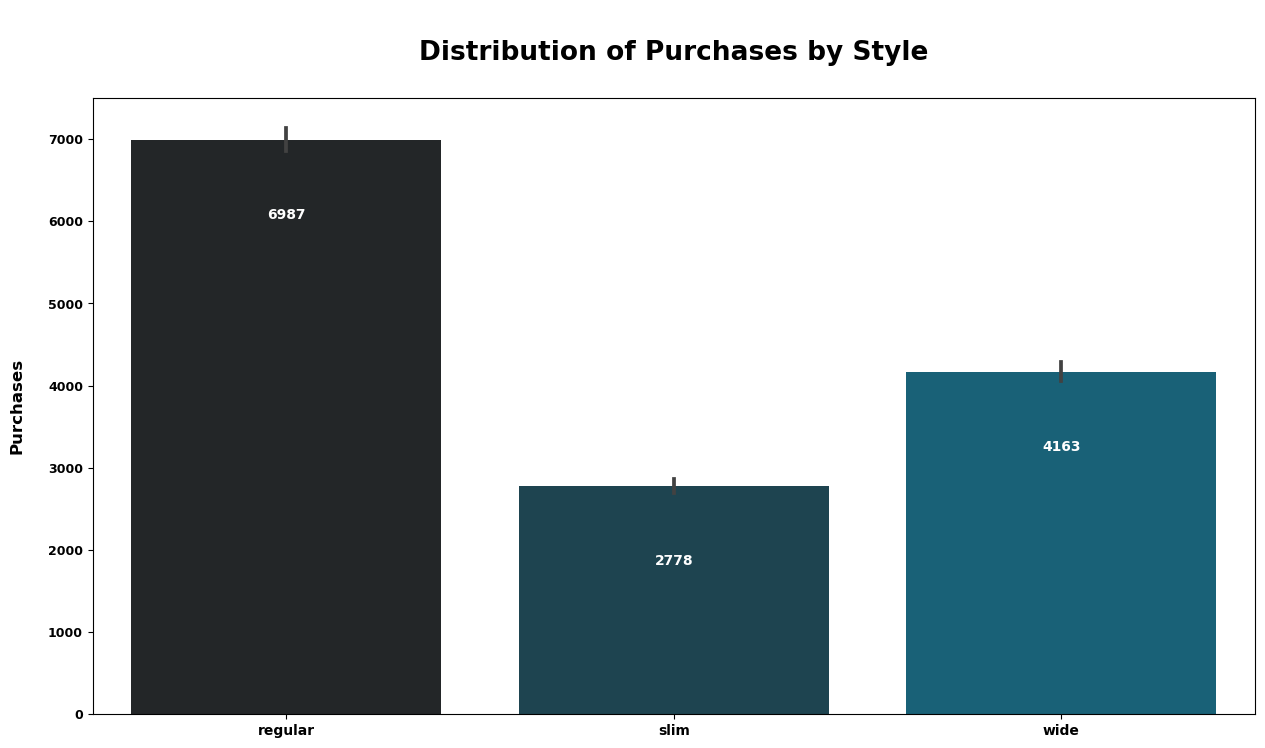

In [57]:
base_color = sns.color_palette("dark:#096A87", as_cmap=True)
colors = sns.color_palette("dark:#096A87", n_colors=len(cleaned_df['style'].unique()))
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=cleaned_df, x='style', y='Purchase Label', palette=colors, estimator='sum')
plt.title('\nDistribution of Purchases by Style\n', fontsize=19, fontweight='bold')
plt.xlabel('\n', fontsize=12, fontweight='bold')
plt.ylabel('Purchases\n', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')

# Add values inside the bars
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 1000, 
            f'{bar.get_height():.0f}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='white')

plt.show()

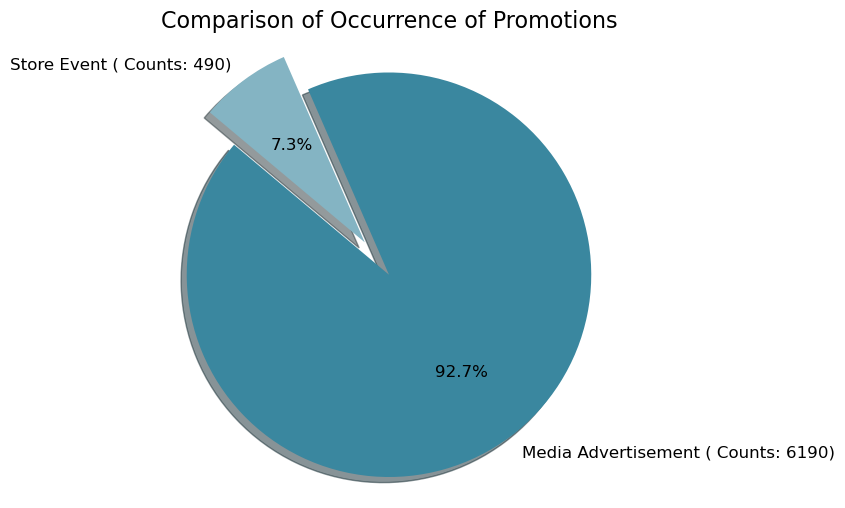

In [58]:
filtered_df_media = cleaned_df[cleaned_df['MediaAdvertisement'] == 1]
filtered_df_store = cleaned_df[cleaned_df['StoreEvent'] == 1]

# Count the occurrences of value 1 in each column
count_1_media = len(filtered_df_media)
count_1_store = len(filtered_df_store)

# Create labels with counts and percentages
labels = ['Media Advertisement', 'Store Event']
sizes = [count_1_media, count_1_store]
colors = ['#3a879f','#84b4c3']  # Blue for MediaAdvertisement, Orange for StoreEvent

# Calculate the percentages
total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]

# Create labels with counts and percentages
labels_with_count = [f'{label} ( Counts: {count})' for label, count in zip(labels, sizes)]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels_with_count, autopct="%1.1f%%", colors=colors, startangle=140, textprops={'fontsize': 12}, shadow=True, explode=(0.1,0.1))
plt.title('Comparison of Occurrence of Promotions', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

In [59]:
# Filter the dataset for promo1 and promo2 separately
promo1_df = cleaned_df[cleaned_df['MediaAdvertisement'] == 1]
promo2_df = cleaned_df[cleaned_df['StoreEvent'] == 1]

# Count the number of purchases for promo1 and promo2
promo1_purchases = len(promo1_df[promo1_df['Purchase Label'] == 1])
promo2_purchases = len(promo2_df[promo2_df['Purchase Label'] == 1])

# Count the total number of customers who received each promo
total_promo1_customers = len(promo1_df)
total_promo2_customers = len(promo2_df)

# Calculate the success rates for promo1 and promo2
promo1_success_rate = (promo1_purchases / total_promo1_customers) * 100
promo2_success_rate = (promo2_purchases / total_promo2_customers) * 100

print("Success Rate for Media Advertisement:", promo1_success_rate, "%")
print("Success Rate for Store Event:", promo2_success_rate, "%")

Success Rate for Media Advertisement: 22.568659127625203 %
Success Rate for Store Event: 23.877551020408163 %


- __Store events are bringing in more purchases compared to media ads, even though there are more media ads happening than store events.__

In [60]:
cleaned_df['year_month_week'] = cleaned_df['Year'].astype(str) + ' ' + cleaned_df['Month'].astype(str) + ' ' + cleaned_df['Week_Number'].astype(str)


In [61]:
cleaned_df = cleaned_df.sort_values('Year')

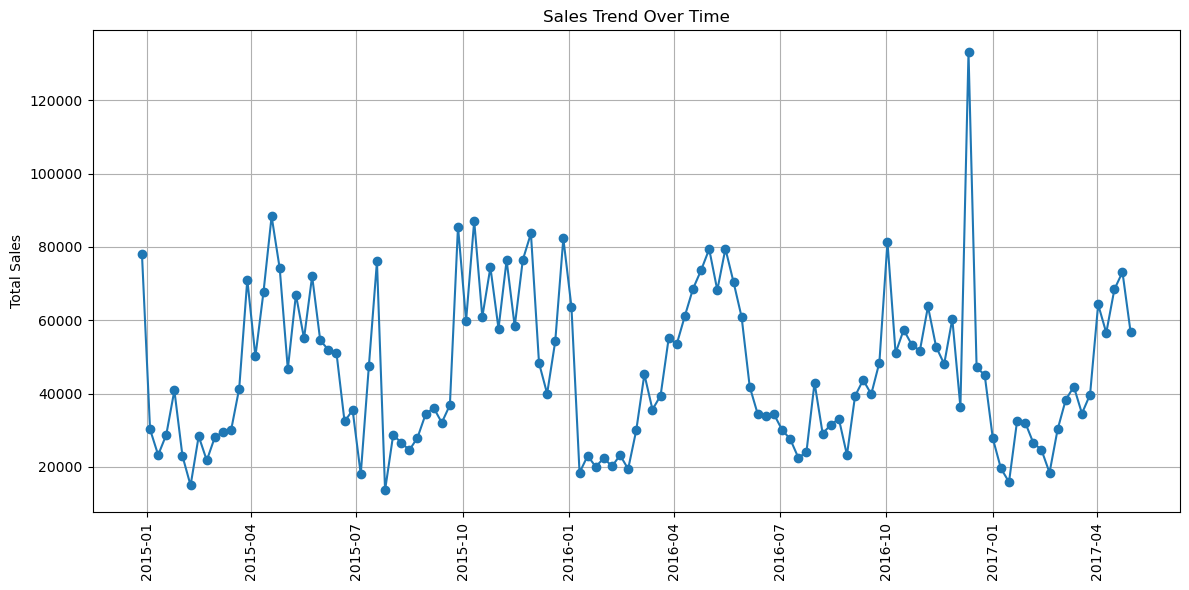

In [62]:
sales_by_week = cleaned_df.groupby('retailweek')['SalesPerWeek'].sum().reset_index()

# Line plot of Sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_by_week['retailweek'], sales_by_week['SalesPerWeek'], marker='o', linestyle='-')
plt.title('Sales Trend Over Time')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

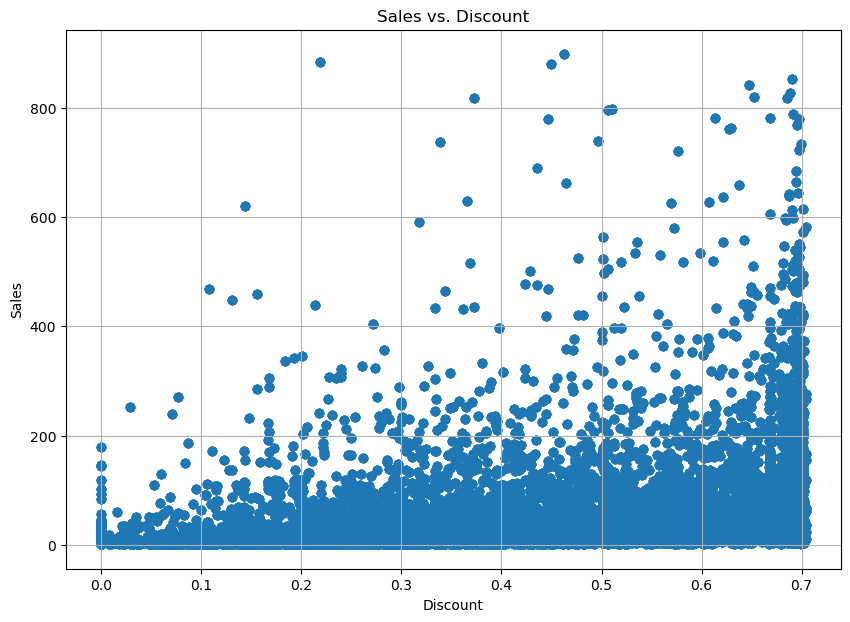

In [63]:
sales_by_price = cleaned_df.groupby(['Discount', 'Week_Number'])['SalesPerWeek'].sum().reset_index()
plt.figure(figsize=(10, 7))
plt.scatter(cleaned_df['Discount'], cleaned_df['SalesPerWeek'], alpha=0.5)
plt.title('Sales vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

- __Higher discounts may lead to increased sales, but this relationship is not strictly linear. Some weeks with higher discounts may not necessarily result in higher sales, and vice versa. Additionally, other factors such as product demand, marketing efforts, and seasonal trends could also influence weekly sales figures.__

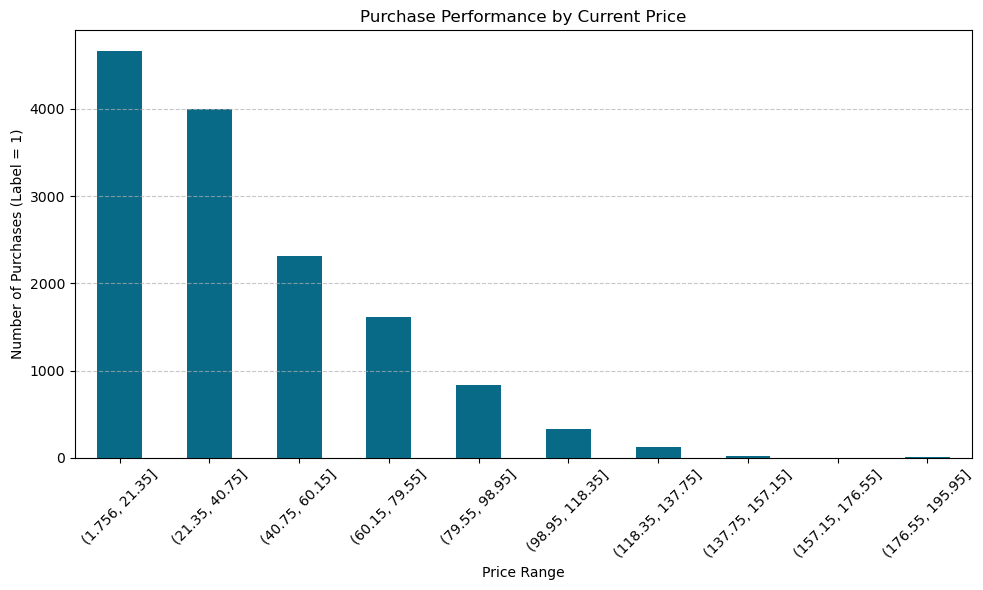

In [64]:
price_ranges = pd.cut(cleaned_df['current_price'], bins=10)

# Group by price ranges and count the number of purchases (label = 1)
purchase_counts = cleaned_df[cleaned_df['Purchase Label'] == 1].groupby(price_ranges)['Purchase Label'].count()

# Plot bar chart
plt.figure(figsize=(10, 6))
purchase_counts.plot(kind='bar', color='#096a87')
plt.title('Purchase Performance by Current Price')
plt.xlabel('Price Range')
plt.ylabel('Number of Purchases (Label = 1)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- __As the discount ratio decreases, indicating an increase in the average current price, there's a corresponding decrease in the number of purchases__

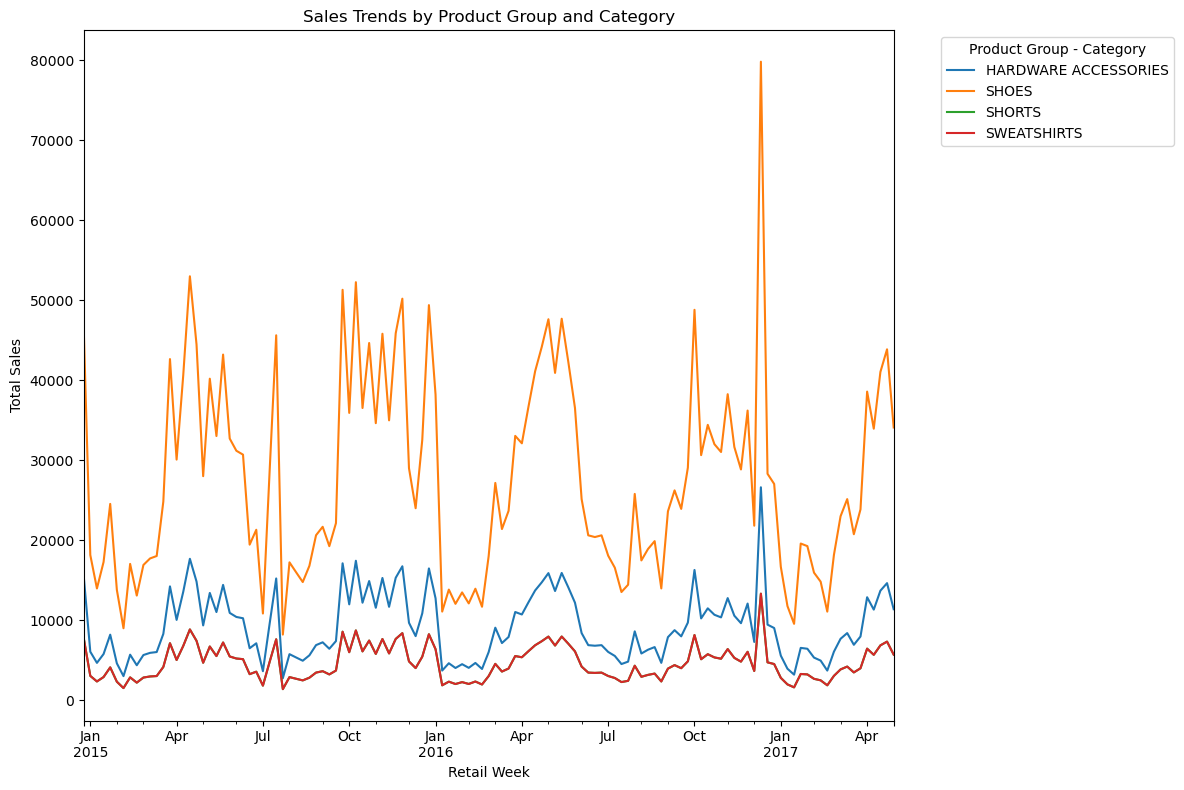

In [65]:
sales_by_product_category_week = cleaned_df.groupby(['productgroup','retailweek'])['SalesPerWeek'].sum().reset_index()

# Pivot the data for better visualization
pivot_table = sales_by_product_category_week.pivot_table(index='retailweek', columns=['productgroup'], values='SalesPerWeek', aggfunc='sum')

# Plotting the line chart
plt.figure(figsize=(12, 8))
pivot_table.plot(ax=plt.gca())
plt.title('Sales Trends by Product Group and Category')
plt.xlabel('Retail Week')
plt.ylabel('Total Sales')
plt.legend(title='Product Group - Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

## Machine Learning

In [100]:
list(cleaned_df.select_dtypes(exclude=['object']).columns)

['SalesPerWeek',
 'regular_price',
 'current_price',
 'ratio',
 'retailweek',
 'MediaAdvertisement',
 'StoreEvent',
 'cost',
 'Purchase Label',
 'Year',
 'Discount',
 'NetProfit',
 'PricesDiff']

In [102]:
list(cleaned_df.select_dtypes(include=['object']).columns)

['country',
 'productgroup',
 'category',
 'style',
 'sizes',
 'gender',
 'Month',
 'Main Color',
 'Second Color']

In [113]:
drop_cols = [ 'SalesPerWeek','retailweek']
cleaned_df = cleaned_df.drop(columns=drop_cols)

<Axes: >

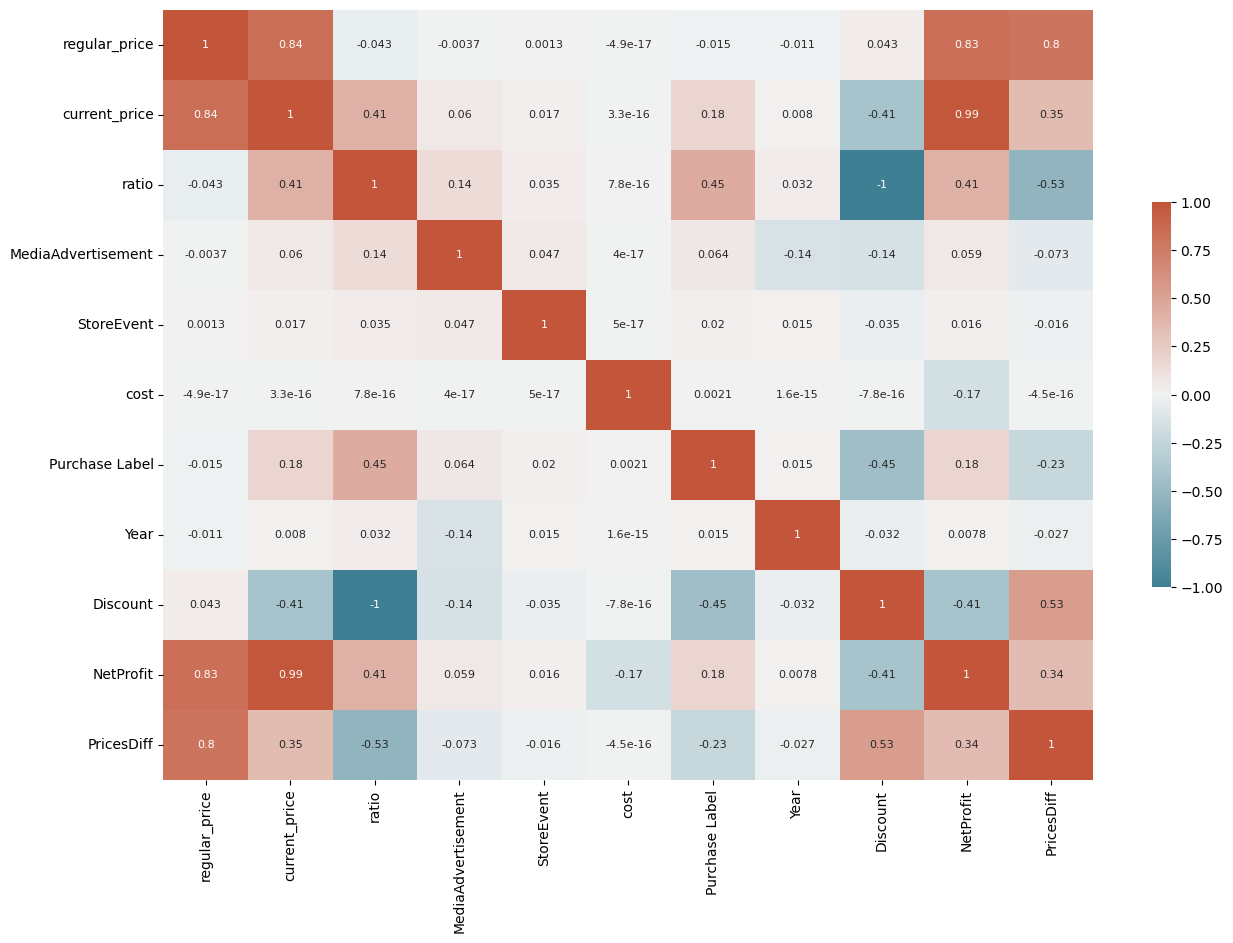

In [114]:
import seaborn as sns
corr = cleaned_df.corr(numeric_only= True)# plot the heatmap

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(corr, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True),                        
            cbar_kws={"shrink": .5}, annot=True,annot_kws={"fontsize":8}
            )

In [115]:
cleaned_df.columns

Index(['country', 'regular_price', 'current_price', 'ratio',
       'MediaAdvertisement', 'StoreEvent', 'productgroup', 'category', 'cost',
       'style', 'sizes', 'gender', 'Purchase Label', 'Year', 'Main Color',
       'Second Color', 'Discount', 'NetProfit', 'PricesDiff'],
      dtype='object')

In [116]:
ohc_df=pd.get_dummies(cleaned_df)
ohc_df

,regular_price,current_price,ratio,MediaAdvertisement,StoreEvent,cost,Purchase Label,Year,Discount,NetProfit,...,Main Color_Gold,Main Color_Grey,Main Color_Light Green,Main Color_Light Pink,Main Color_Orange,Main Color_Sky Blue,Main Color_Steel Blue,Second Color_Baby Blue,Second Color_Pink,Second Color_Ruddy Pink
99305,3.95,1.95,0.494,1,0,4.20,0,2014,0.506,-2.25,...,False,False,False,False,False,False,True,True,False,False
64703,62.95,38.95,0.619,1,0,9.00,1,2014,0.381,29.95,...,False,False,False,True,False,False,False,True,False,False
64704,62.95,38.95,0.619,1,0,9.60,1,2014,0.381,29.35,...,False,False,False,False,False,False,False,True,False,False
64705,62.95,38.95,0.619,1,0,4.20,0,2014,0.381,34.75,...,False,False,False,False,False,False,True,True,False,False
64706,62.95,38.95,0.619,1,0,9.90,1,2014,0.381,29.05,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4683,69.95,44.95,0.643,0,0,9.00,1,2017,0.357,35.95,...,False,False,False,True,False,False,False,True,False,False
4684,69.95,44.95,0.643,0,0,9.60,0,2017,0.357,35.35,...,False,False,False,False,False,False,False,True,False,False
70566,26.95,21.95,0.814,0,0,9.90,0,2017,0.186,12.05,...,False,False,False,False,False,False,False,False,False,True
70568,26.95,21.95,0.814,0,0,1.29,1,2017,0.186,20.66,...,False,True,False,False,False,False,False,False,False,True


In [117]:
X=ohc_df.drop('Purchase Label', axis=1)
y=ohc_df['Purchase Label']

In [118]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [119]:
x_train

,regular_price,current_price,ratio,MediaAdvertisement,StoreEvent,cost,Year,Discount,NetProfit,PricesDiff,...,Main Color_Gold,Main Color_Grey,Main Color_Light Green,Main Color_Light Pink,Main Color_Orange,Main Color_Sky Blue,Main Color_Steel Blue,Second Color_Baby Blue,Second Color_Pink,Second Color_Ruddy Pink
18133,3.95,3.95,1.000,1,0,9.00,2016,0.000,-5.05,0.0,...,False,False,False,True,False,False,False,True,False,False
41623,21.95,12.95,0.590,0,0,9.00,2016,0.410,3.95,9.0,...,False,False,False,True,False,False,False,True,False,False
45947,93.95,29.95,0.319,0,0,5.20,2016,0.681,24.75,64.0,...,False,False,False,False,False,True,False,False,False,True
33799,82.95,52.95,0.638,0,0,8.70,2015,0.362,44.25,30.0,...,False,False,False,False,False,False,False,False,False,True
49572,6.95,4.95,0.712,0,0,1.70,2017,0.288,3.25,2.0,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94842,55.95,16.95,0.303,0,0,1.70,2015,0.697,15.25,39.0,...,True,False,False,False,False,False,False,False,True,False
43765,30.95,14.95,0.483,0,0,4.20,2016,0.517,10.75,16.0,...,False,False,False,False,False,False,True,True,False,False
74381,20.95,11.95,0.570,0,0,2.29,2016,0.430,9.66,9.0,...,False,False,True,False,False,False,False,False,True,False
87965,35.95,23.95,0.666,0,0,4.20,2015,0.334,19.75,12.0,...,False,False,False,False,False,False,True,True,False,False


In [121]:
x_train.columns


Index(['regular_price', 'current_price', 'ratio', 'MediaAdvertisement',
       'StoreEvent', 'cost', 'Year', 'Discount', 'NetProfit', 'PricesDiff',
       'country_Austria', 'country_France', 'country_Germany',
       'productgroup_HARDWARE ACCESSORIES', 'productgroup_SHOES',
       'productgroup_SHORTS', 'productgroup_SWEATSHIRTS',
       'category_FOOTBALL GENERIC', 'category_GOLF', 'category_INDOOR',
       'category_RELAX CASUAL', 'category_RUNNING', 'category_TRAINING',
       'style_regular', 'style_slim', 'style_wide', 'sizes_xs,s,m,l,xl',
       'sizes_xxs,xs,s,m,l,xl,xxl', 'gender_kids', 'gender_men',
       'gender_unisex', 'gender_women', 'Main Color_Blue Violet',
       'Main Color_Dark Grey', 'Main Color_Dark Red', 'Main Color_Gold',
       'Main Color_Grey', 'Main Color_Light Green', 'Main Color_Light Pink',
       'Main Color_Orange', 'Main Color_Sky Blue', 'Main Color_Steel Blue',
       'Second Color_Baby Blue', 'Second Color_Pink',
       'Second Color_Ruddy Pink'],
 

In [122]:
# Logisitic Regression classifier
log_clf = LogisticRegression(max_iter=10000)
log_clf.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [123]:
log_clf.score(x_test,y_test)

0.85745

In [124]:
log_clf.score(x_train,y_train)

0.857225

- __Because the data is not balanced and small number of data and the time constraint I choose the Logistic Regression algorithm to use for this problem to classify potential customer purchase.__


- __It have 85% confidence to classify future customers and we can collect more data to target more customers that have higher percent for completing a sale__